In [2]:
import pandas as pd
from datasets import load_dataset
import json
import random

In [4]:
folder_path = "/Users/lsir/lm-evaluation-harness/evaluation/news_23_24_final.jsonl"

data = []
with open(folder_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

random.shuffle(data)

data12800 = data[:12800]

data1000 = data[:1000]

with open("/Users/lsir/lm-evaluation-harness/evaluation/12800_news_23_24.jsonl", "w") as f:
    for data in data12800:
        f.write(json.dumps(data) + "\n")

with open("/Users/lsir/lm-evaluation-harness/evaluation/1000_news_23_24.jsonl", "w") as f:
    for data in data1000:
        f.write(json.dumps(data) + "\n")


In [21]:
folder_path = "/Users/lsir/lm-evaluation-harness/evaluation/12800_news_23_24.jsonl"

data = []
with open(folder_path, "r") as f:
    for line in f:
        tmp = json.loads(line)
        if len(tmp['text']) > 512:
            data.append(tmp)

data1000_mcq = data[:1000]

with open("/Users/lsir/lm-evaluation-harness/evaluation/1000_mcq_news_23_24.jsonl", "w") as f:
    for data_ in data1000_mcq:
        f.write(json.dumps(data_) + "\n")

data1000_mcm = data[1000:2000]

with open("/Users/lsir/lm-evaluation-harness/evaluation/1000_mcm_news_23_24.jsonl", "w") as f:
    for data_ in data1000_mcm:
        f.write(json.dumps(data_) + "\n")


In [14]:
from datasets import Dataset
import os

folder_path = "/Users/lsir/lm-evaluation-harness/evaluation/12800_news_23_24.jsonl"

# Set the folder containing the .txt files
dataset_name = "nytimes_2023_2024_verbatim_512"
pre_len = 512

# Read text files into a list of dicts
data = []
# for filename in os.listdir(folder_path):
#     if filename.endswith(".txt"):
#         with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as f:
#             data.append({"filename": filename, "text": f.read()})
with open(folder_path, "r") as f:
    for line in f:
        data.append(json.loads(line))
# Create a Hugging Face Dataset
dataset = Dataset.from_list(data)



<AxesSubplot: >

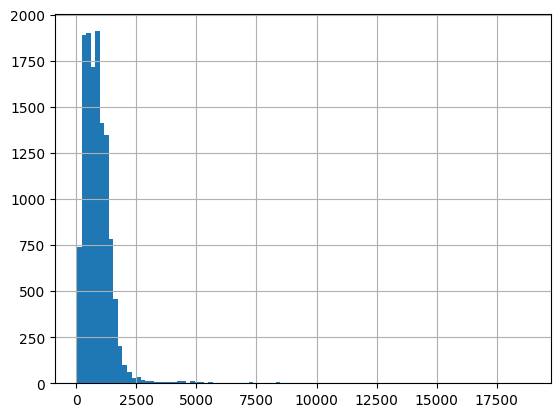

In [15]:
dataset.to_pandas()['text'].apply(lambda x: len(x.split())).hist(bins=100)

In [16]:
from transformers import AutoTokenizer
# get the first 20000 examples
# fset = dataset["train"].select(range(12800))
fset = dataset
tokenizer = AutoTokenizer.from_pretrained('alehc/swissai-tokenizer')

In [17]:
# from transformers import AutoTokenizer
# # get the first 20000 examples
# subset = dataset["train"].select(range(12800))
# tokenizer = AutoTokenizer.from_pretrained('alehc/swissai-tokenizer')

def split_example(examples, input_size=pre_len, max_tokens=4096):
    # text = example['text']
    # tokens = tokenizer.tokenize(text)
    # input = tokenizer.convert_tokens_to_string(tokens[:input_size])
    # target = tokenizer.convert_tokens_to_string(tokens[input_size:max_tokens])
    # return {'input_text': input, 'target_text': target}
    input_texts = []
    target_texts = []
    
    for i, text in enumerate(examples['text']):
        tokens = tokenizer.tokenize(text)
        input = tokenizer.convert_tokens_to_string(tokens[:input_size])
        target = tokenizer.convert_tokens_to_string(tokens[input_size:max_tokens])
        input_texts.append(input)
        target_texts.append(target)
    
    return {'input_text': input_texts, 'target_text': target_texts}

subset = fset.map(split_example, batched=True)


Map:   0%|          | 0/12800 [00:00<?, ? examples/s]

In [18]:
positive_examples = subset.filter(lambda example: len(example['target_text']) != 0)

Filter:   0%|          | 0/12800 [00:00<?, ? examples/s]

In [19]:
# push the dataset to the hub
from datasets import Dataset, DatasetDict

HF_TOKEN=''
from huggingface_hub import login
login(HF_TOKEN)
DatasetDict({'test': positive_examples}).push_to_hub(dataset_name)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/11 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mansaripo/nytimes_2023_2024_verbatim_512/commit/08d751f60496be0d7d764422fd70036f0a81aad6', commit_message='Upload dataset', commit_description='', oid='08d751f60496be0d7d764422fd70036f0a81aad6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mansaripo/nytimes_2023_2024_verbatim_512', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mansaripo/nytimes_2023_2024_verbatim_512'), pr_revision=None, pr_num=None)